# Use wordsfrom articles to form a word cloud
This can be done a couple different ways. A word cloud that represents all articles can be made by looking at all the unique keywords. \
A word cloud for each article can be made by just looking at the article content.

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

### Get articles and NLP so we can extract the keywords as well

In [2]:
with open('../secrets.json') as file:
    secrets = json.load(file)
    connection_string = secrets['connection_string']

db = create_engine(connection_string)
df = pd.read_sql('''
        select * 
        from news_article art inner join news_articlenlp nlp
            on art.id = nlp.article_id
    ''', 
    con=db
)

## Create a word cloud representing all articles

### Extract all keywords

In [3]:
keywords = []

for i in range(len(df)):
    article_keywords = df.iloc[i]['keywords']
    keywords += article_keywords.split(';')
    
# manually remove the word 'said' because it shows up way too often
keywords = [word for word in keywords if word != 'said']
    
keywords[:10]

['really',
 'take',
 'something',
 'show',
 'real',
 'race',
 'proof',
 'project',
 'measurements',
 'disorders']

### Use the keywords to construct a word cloud

(-0.5, 399.5, 199.5, -0.5)

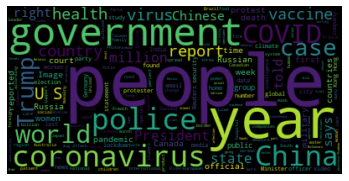

In [4]:
# need a big string with all words for the cloud
words_for_cloud = ' '.join(keywords)
wordcloud = WordCloud().generate(words_for_cloud)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### Find word frequencies

In [5]:
word_counts = {}

for word in keywords:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts.update({word: 1})

In [6]:
# show counts for the first 10 words
for key in list(word_counts.keys())[:10]:
    print(f'{key}: {word_counts[key]}')

really: 22
take: 48
something: 7
show: 16
real: 5
race: 4
proof: 3
project: 21
measurements: 1
disorders: 1


### Function to find the top n word counts in a dictionary

In [11]:
# find the top n words
def get_top_n_words(counts: dict, n: int) -> dict:
    return

{'measurements': 1,
 'disorders': 1,
 'Milton': 1,
 'Keynes': 1,
 'numbness': 1,
 'restricted': 1,
 'wealthy': 1,
 'CRPH': 1,
 'Fukushima': 1,
 'Shankill': 1,
 'NOAA': 1,
 'READING': 1,
 'CONTINUE': 1,
 'BELOW': 1,
 'Szydlo': 1,
 'Donziger': 1,
 'wasting': 1,
 'Wescam': 1,
 'sunk': 1,
 'notify': 1,
 'interpreters': 1,
 'convictions': 1,
 'Horizon': 1,
 'appalling': 1,
 'Ghaziabad': 1,
 'wait': 1,
 'Rules': 1,
 'reservoirs': 1,
 'Maswadeh': 1,
 'Arabs': 1,
 'AIS': 1,
 'EEZ': 1,
 'weighs': 1,
 'trigger': 1,
 'rat': 1,
 'age': 1,
 'day': 1,
 'Chelonoidis': 1,
 'phantasticus': 1,
 'ago': 1,
 'Fernandina': 1,
 'law': 1,
 'snapshot': 1,
 'set': 1,
 'regulated': 1,
 'carriers': 1,
 'Marx': 1,
 'Oslo': 1,
 'alerted': 1,
 'Gulyás': 1,
 'DfID': 1,
 'Ebru': 1,
 'caseload': 1,
 'insulin': 1,
 'aggravated': 1,
 'passer-by': 1,
 'Obono': 1,
 'condemnation': 1,
 'anti-racism': 1,
 'Masks': 1,
 'Zhukov': 1,
 'Andersen': 1,
 'Dubé': 1,
 'unfavorable': 1,
 'Hillary': 1,
 'Clinton': 1,
 'Stadler': 1,
 'd

### Show word counts as bar graph
need to update this to just show the top n counts

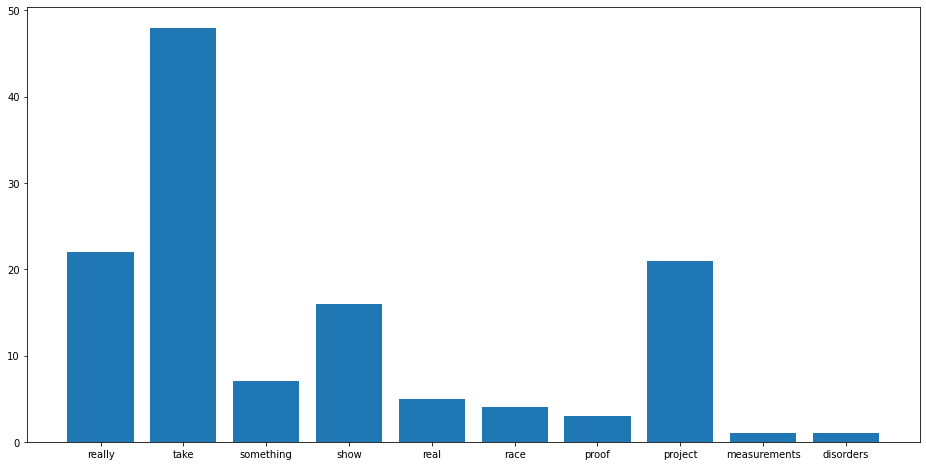

In [7]:
plt.figure(figsize=(16,8))
plt.bar(
    [i for i in range(10)], 
    [word_counts[key] for key in list(word_counts.keys())[:10]],
    tick_label=[key for key in list(word_counts.keys())[:10]]
)
plt.show()